# Detección probema MNIST

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from demo_utils.general import get_data
from sklearn.kernel_approximation import Nystroem
from sklearn.decomposition import PCA
from demo_utils.demo0 import Demo0
from demo_utils.learning import get_model
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
m_base = {
    'model_name': 'dt',
    'sampler_name': 'rbf',
    'box_type': 'black_bag',
    'n_estim': 5,
    'pca': True,
    'pca_first': False
}
info = {
    'models': [m_base],
    'features_range': (300, 1000),
    'dts_size': 1000,
    'dts_name': 'mnist'
}

In [5]:
demo = Demo0()

0


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

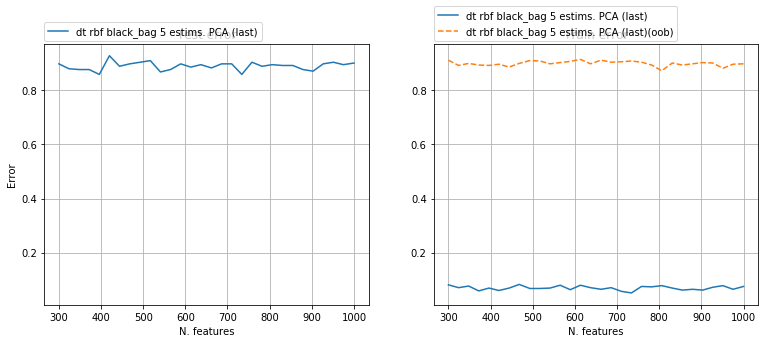

1


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

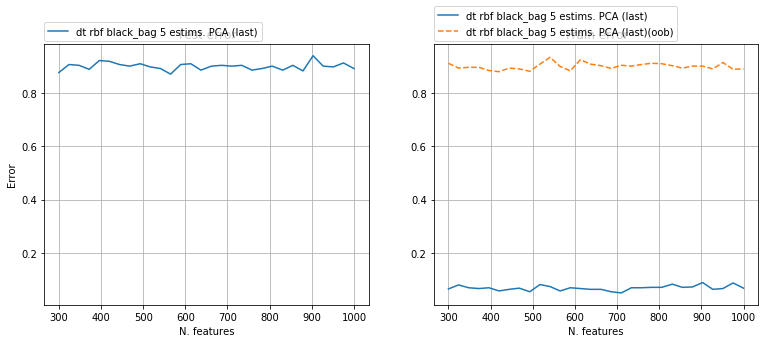

2


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

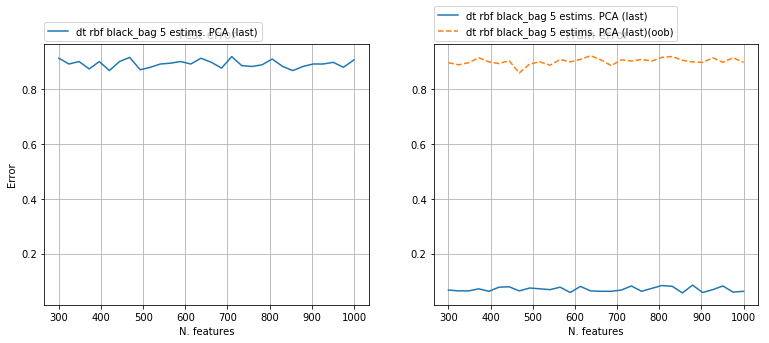

3


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

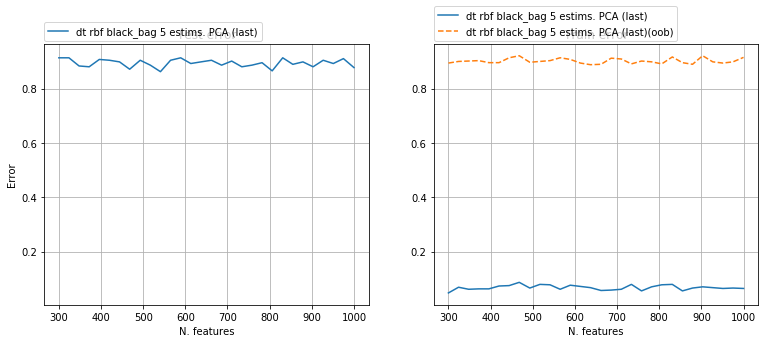

4


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

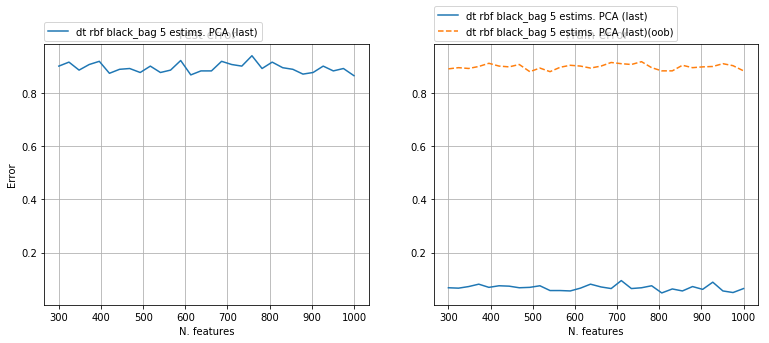

5


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

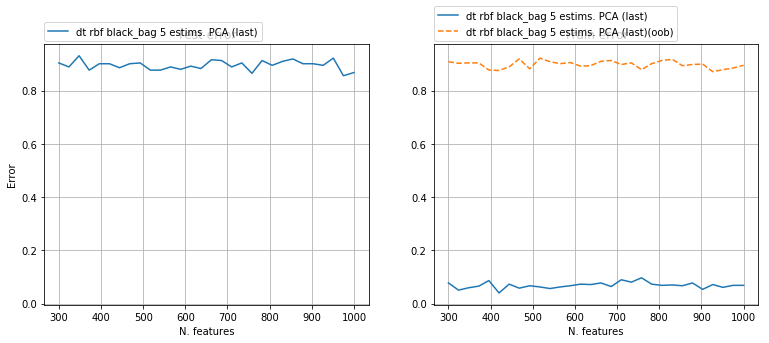

6


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

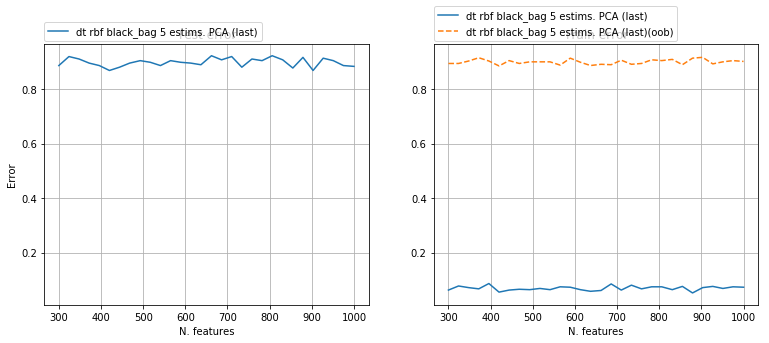

7


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

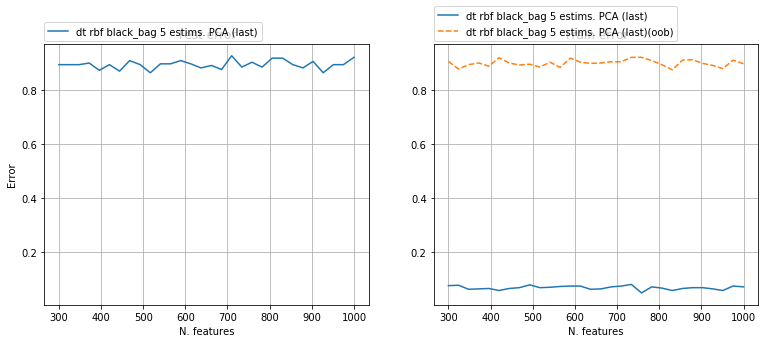

8


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

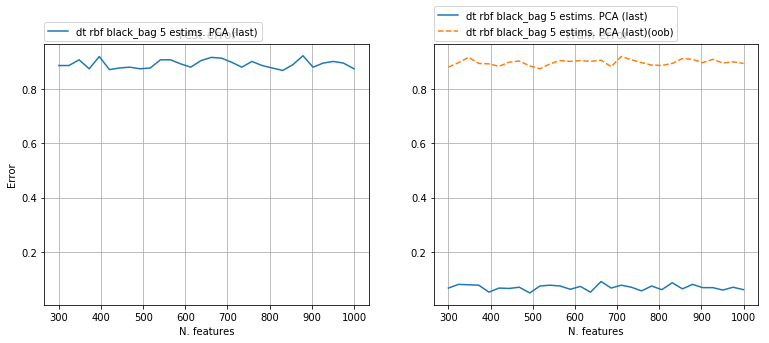

9


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

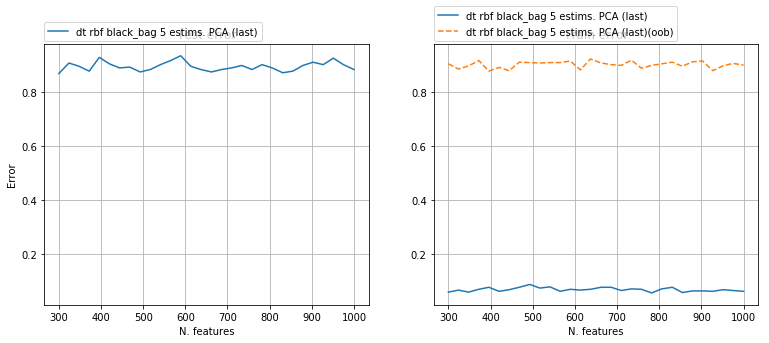

10


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

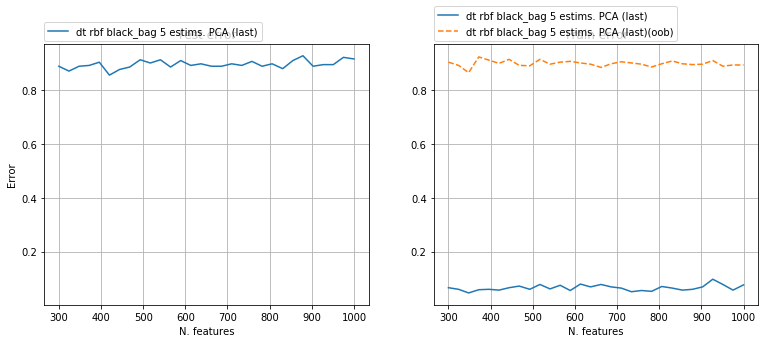

11


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

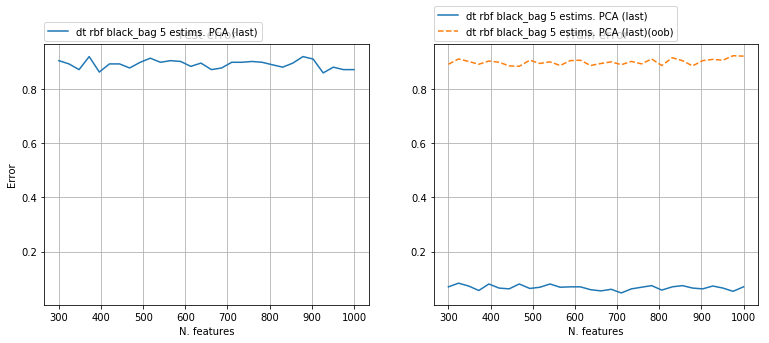

12


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

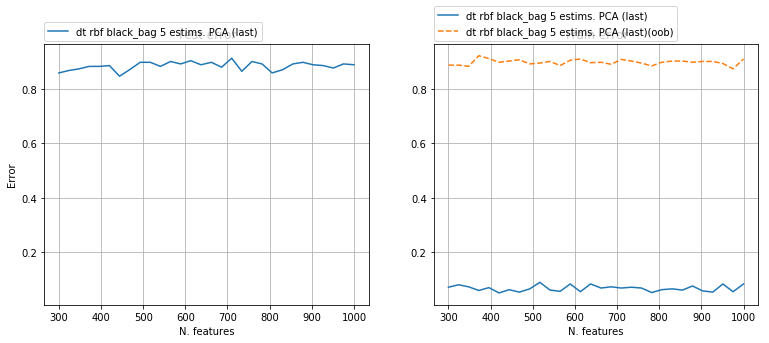

13


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

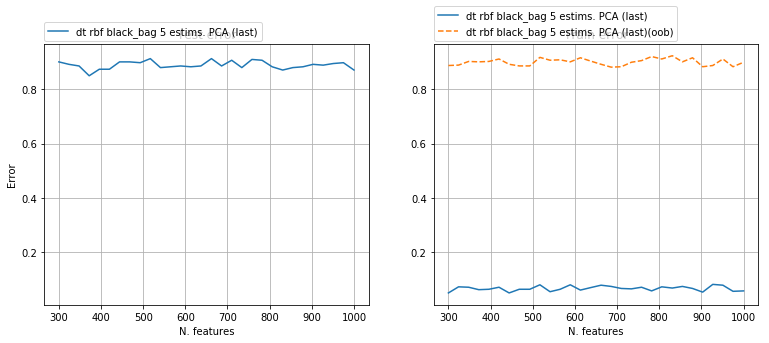

14


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

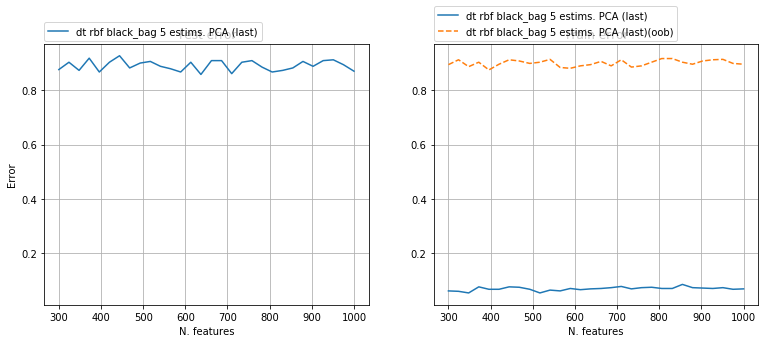

15


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

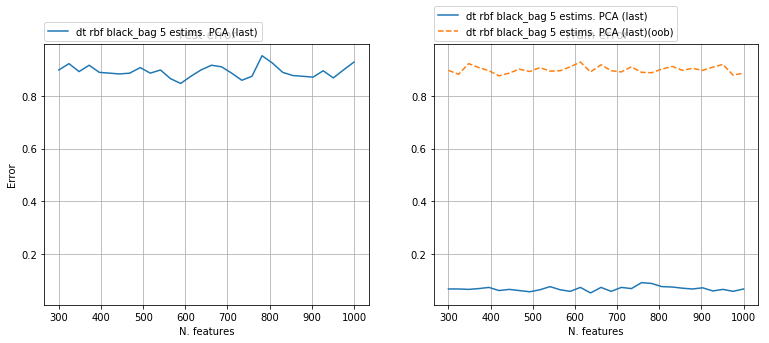

16


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

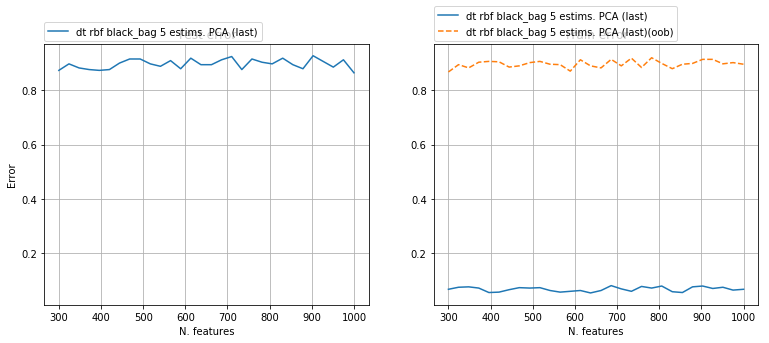

17


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

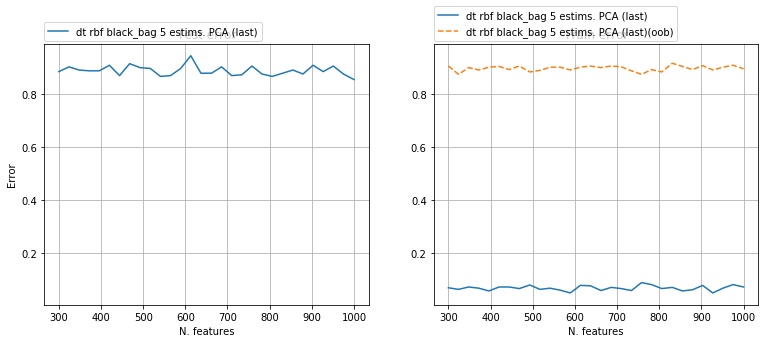

18


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

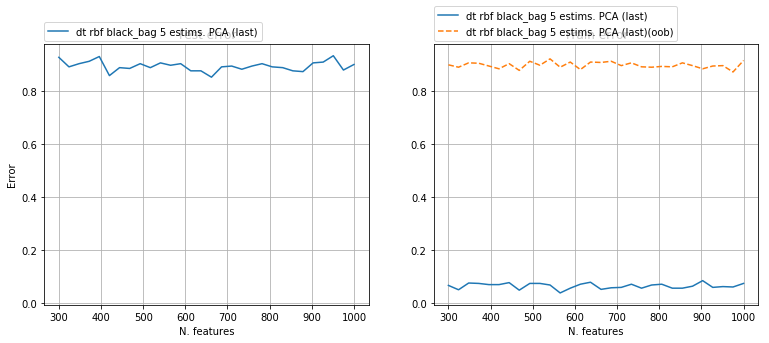

19


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

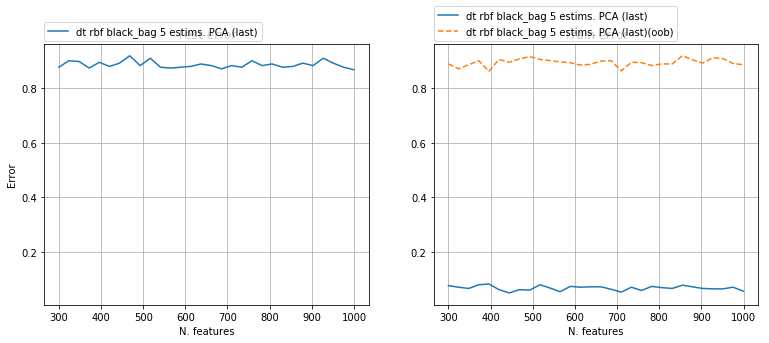

20


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

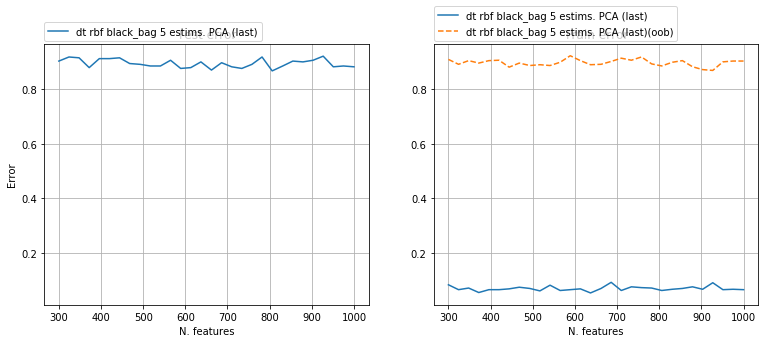

21


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

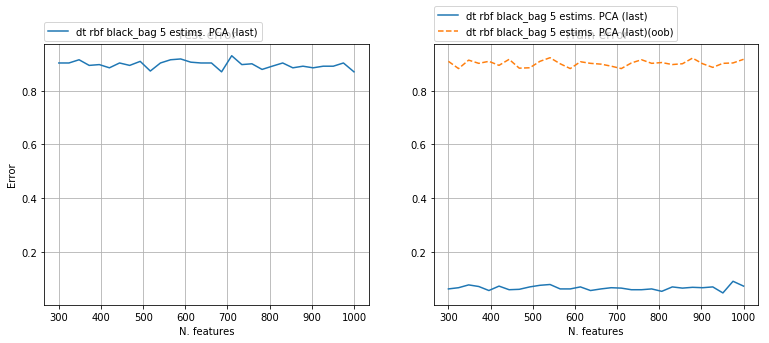

22


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

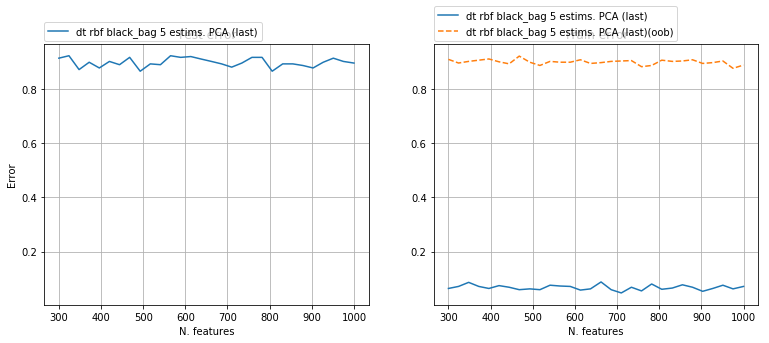

23


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

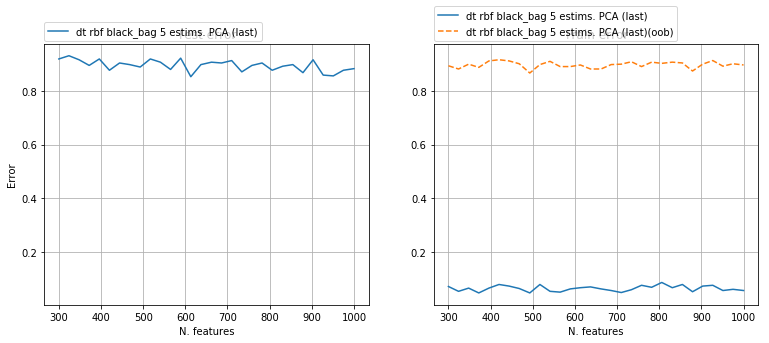

24


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

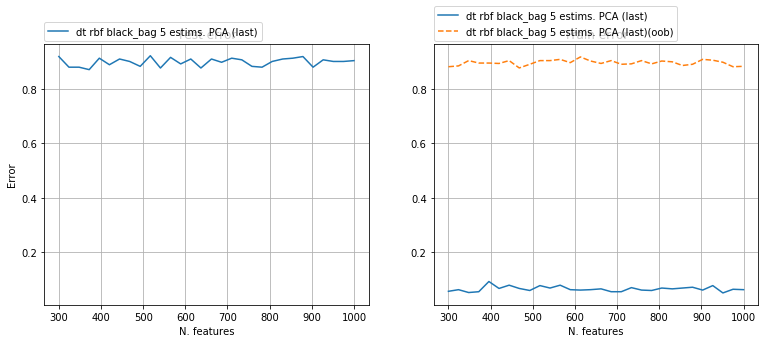

25


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

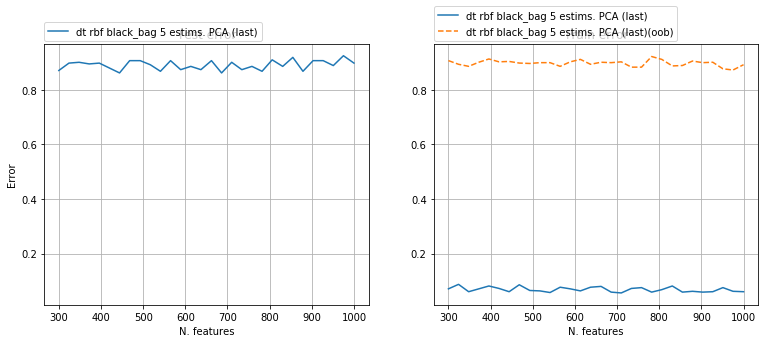

26


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

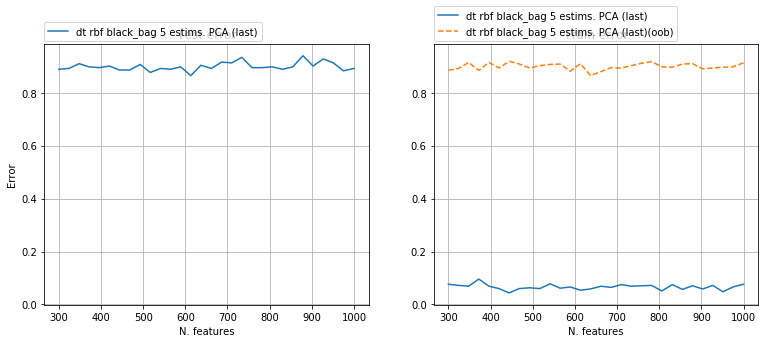

27


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

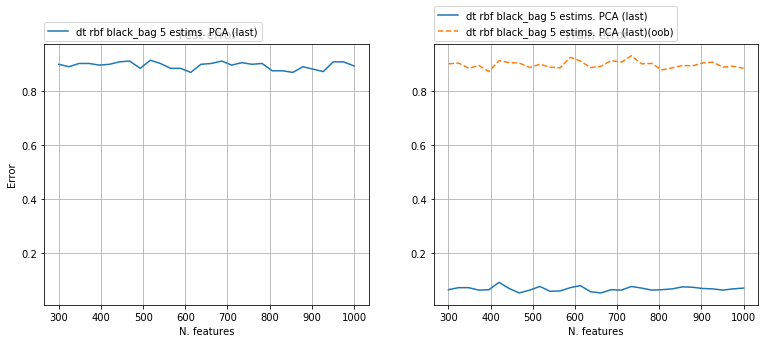

28


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

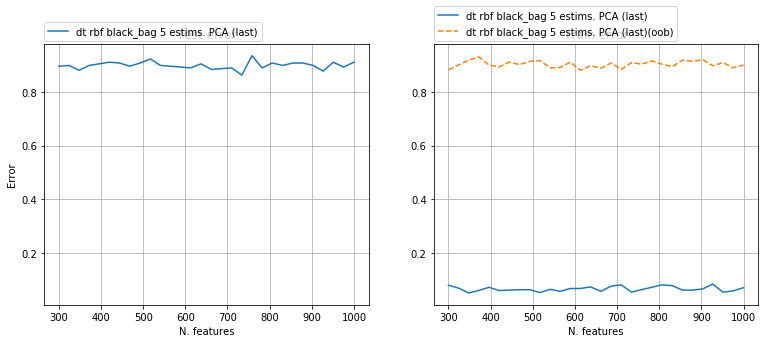

29


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

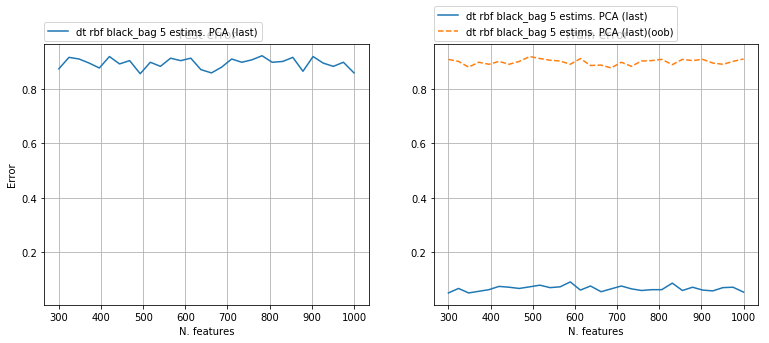

30


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

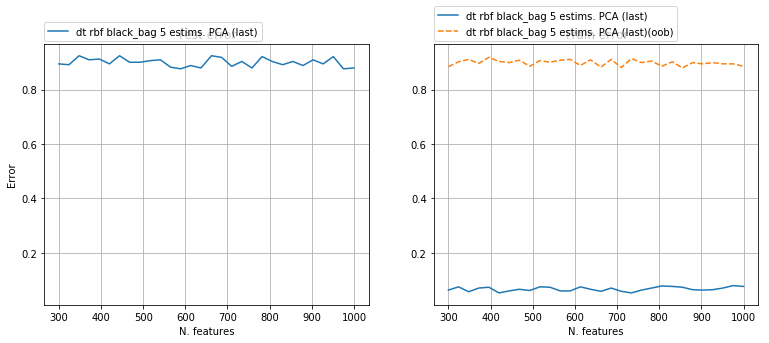

31


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

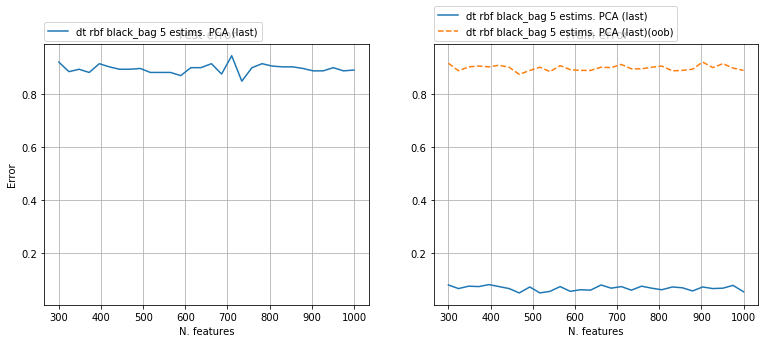

32


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

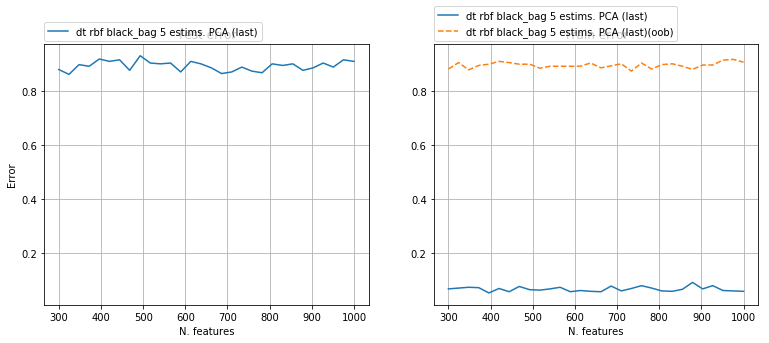

33


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

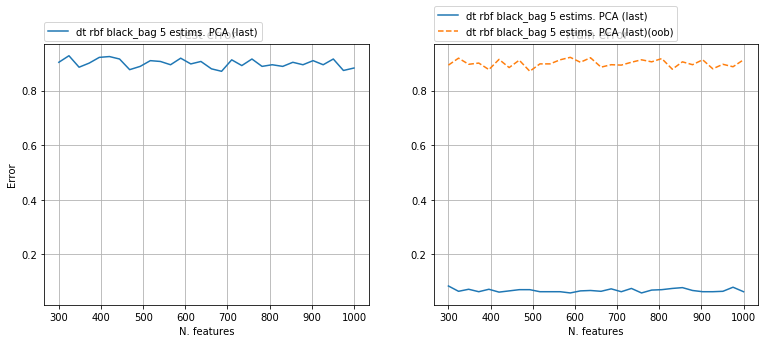

34


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

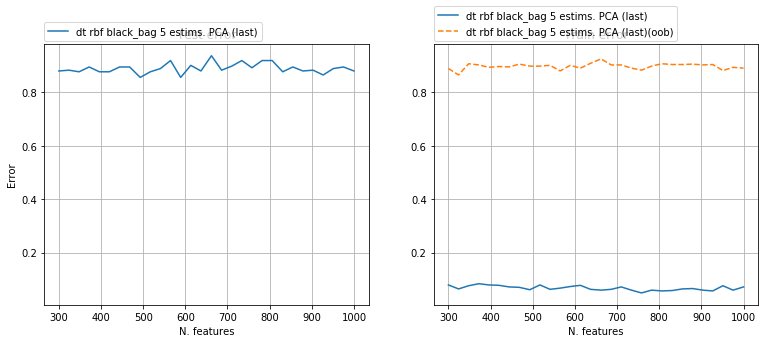

35


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

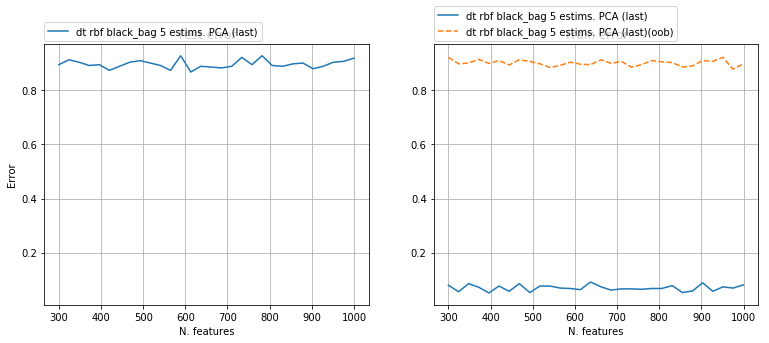

36


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

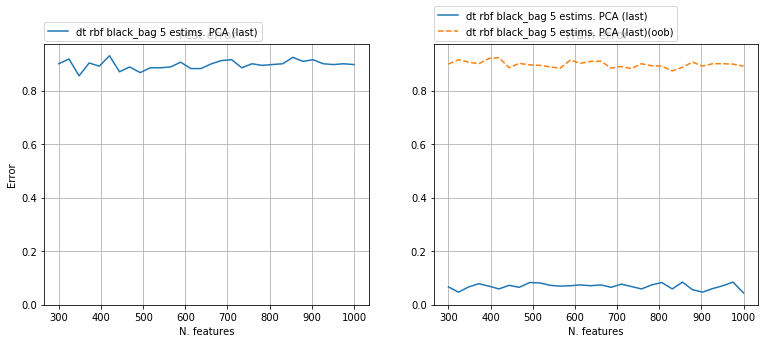

37


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

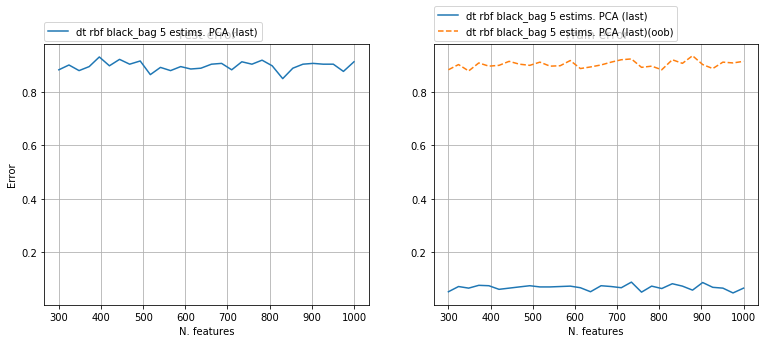

38


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

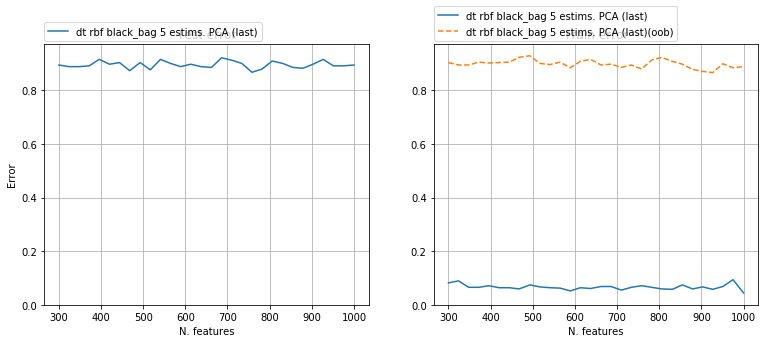

39


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

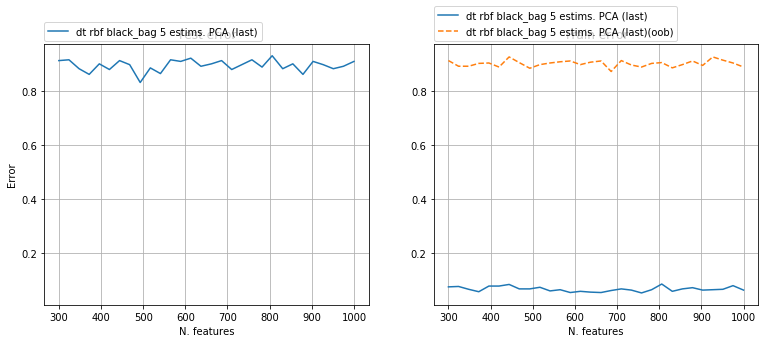

40


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

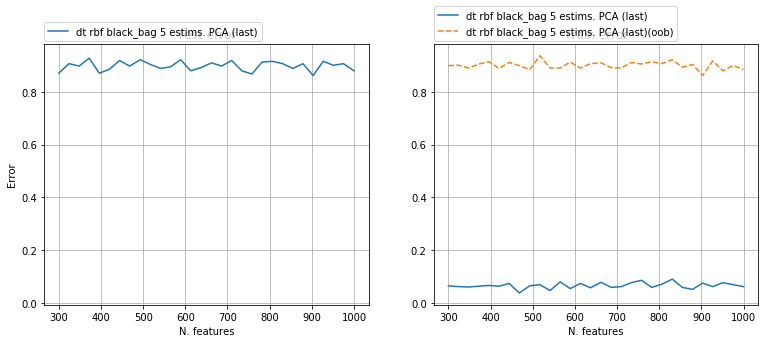

41


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

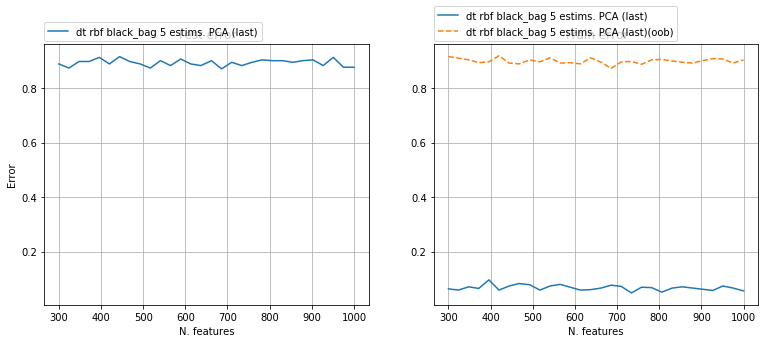

42


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

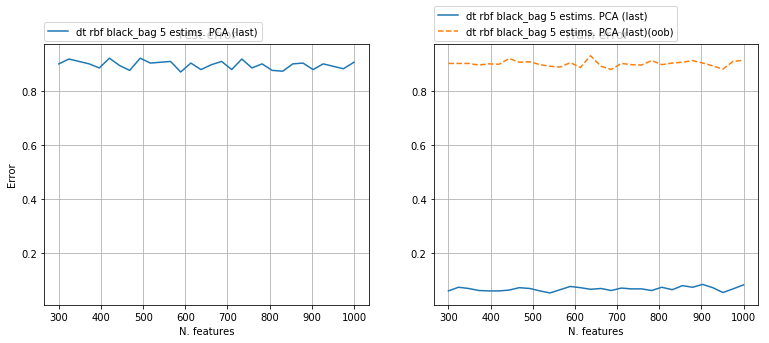

43


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

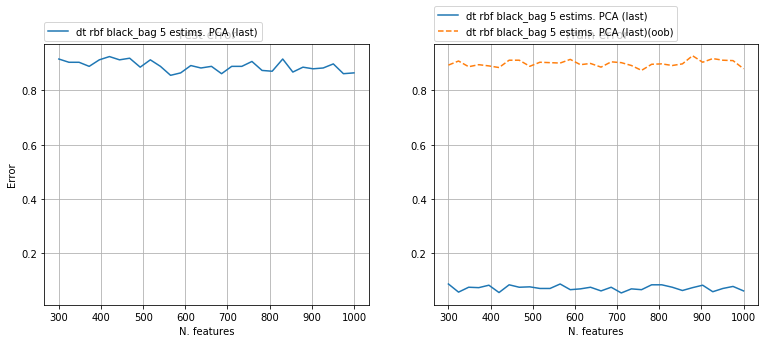

44


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

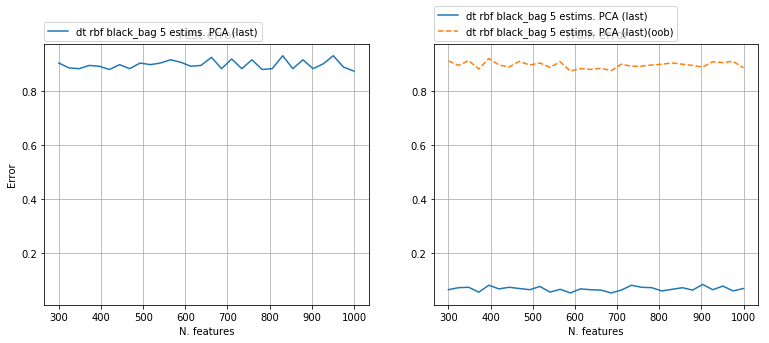

45


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

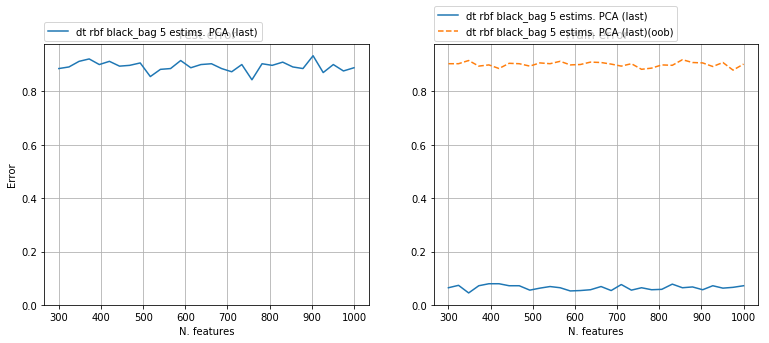

46


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

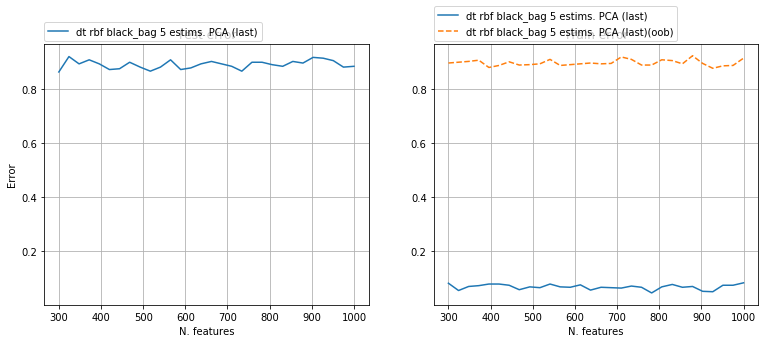

47


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

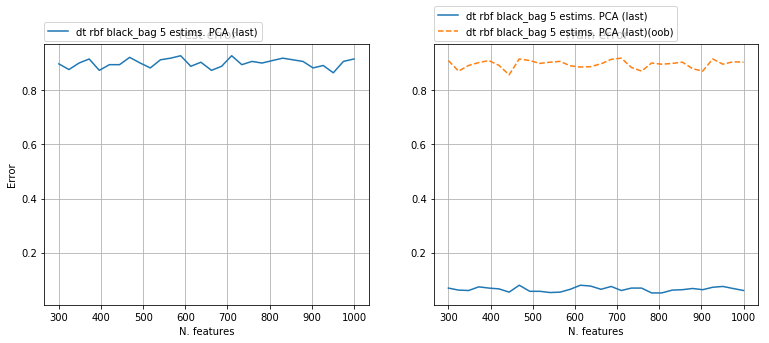

48


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

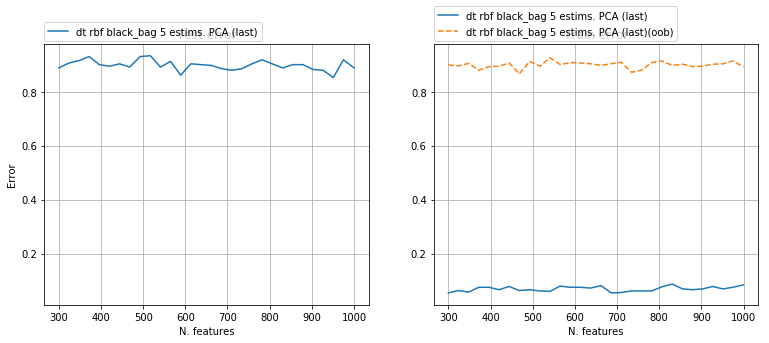

49


# Una demo genérica


- Dataset: **mnist**
- Size: **1000**
        

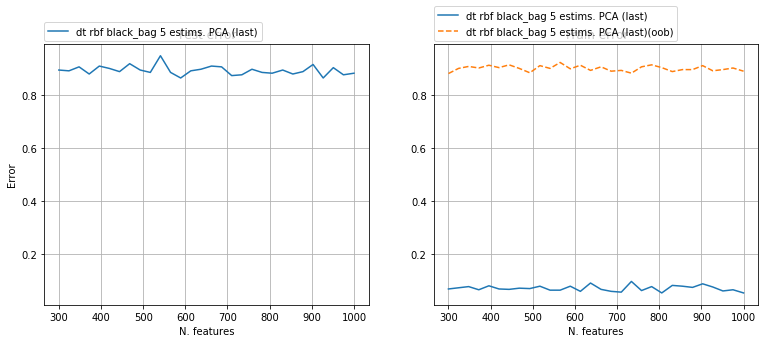

In [6]:
for i in range(50):
    print(i)
    demo.non_interactive(**info)

In [ ]:
d = get_data('mnist', n_ins = 2000)

data_train = d['data_train']
data_test = d['data_test']
target_train = d['target_train']
target_test = d['target_test']

## Directamente con Nystroem

In [ ]:
nys = Nystroem(gamma=0.2, n_components = 500)
pca = PCA(n_components=0.9, svd_solver="full")

In [ ]:
pca.fit(data_train, target_train)

In [ ]:
trans_data = pca.transform(data_train)

In [ ]:
trans_data.shape

In [ ]:
nys.fit(trans_data)

In [ ]:
t = nys.transform(trans_data)

In [ ]:
t.shape

No da ningún problema

Repetirlo muchas veces

In [ ]:
nys = Nystroem(gamma=0.2, n_components = 500)
pca = PCA(n_components=0.9, svd_solver="full")
for i in range(20):
    print('One iteration')
    nys.set_params(n_components=200)
    
    nys.fit(trans_data)
    trans_data = nys.transform(trans_data)
    
    pca.fit(trans_data, target_train)
    t = pca.transform(trans_data)

    
print('ended')

## Usando el get_model que tengo hecho

In [ ]:
mod = get_model(
    model_name='dt',
    sampler_name='nystroem',
    pca_bool=False,
    n_estim=20,
    box_type='black',
    gamma=0.2,
    C=1
)

In [ ]:
for f in range(2, 800, 100):
    mod.set_params(sampler__n_components=f)
    mod.fit(data_train, target_train)
    train_score = mod.score(data_train, target_train)
    test_score = mod.score(data_test, target_test)
    print(f)
    print(train_score, test_score)

No da ningún problema

## Usando la demo0

In [ ]:
m_base = {
    'model_name': 'dt',
    'sampler_name': 'rbf',
    'box_type': 'none',
    'n_estim': None,
    'pca': True,
    'pca_first': False
}
info = {
    'models': [m_base],
    'features_range': (300, 1000),
    'dts_size': 1000,
    'dts_name': 'mnist'
}

In [ ]:
demo = Demo0()

In [ ]:
for i in range(50):
    print(i)
    demo.non_interactive(**info)